# Tarea 2: Andrés Gómez Arias

In [1]:
import matplotlib.pyplot as plt
import scipy as sc
import scipy.special as scp
import numpy as np

## 1. Ecuaciones Paramétricas

#### (i) $x=4cos(t)$ ; $y=2*sin(2t)$

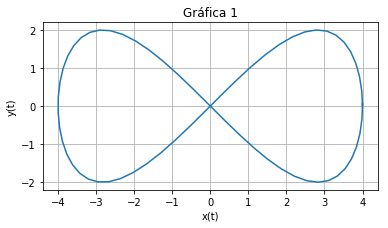

In [2]:
t=np.arange(0.0,2.0*np.pi+0.1,0.1)
plt.plot(4*np.cos(t),2*np.sin(2*t))
plt.axis('scaled')
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.title('Gráfica 1')
plt.grid(True)
plt.show()

#### (ii) $x=2cos(\theta)+cos(2\theta)$ ; $y = 2sin(\theta) -sin(2\theta)$

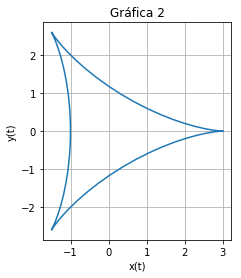

In [3]:
t=np.arange(0.0,2.0*np.pi+0.1,0.1)
plt.plot(2*np.cos(t)+np.cos(2*t),2*np.sin(t)-np.sin(2*t))
plt.axis('scaled')
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.title('Gráfica 2')
plt.grid(True)
plt.show()

#### (iii) $x=sin(t)−\Big[e^{cos(t)}−2cos(4t)−sin^{5}(\frac{1}{12})\Big]$ ; $y=cos(t)−\Big[e^{cos(t)}−2cos(4t)−sin^{5}(\frac{1}{12})\Big]$

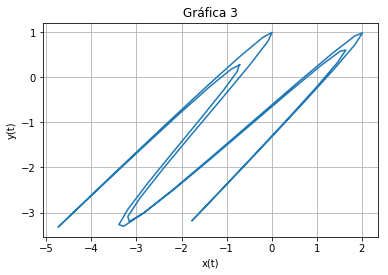

In [4]:
t=np.arange(0.0,2.0*np.pi+0.1,0.1)
A = np.exp(np.cos(t))-2*np.cos(4*t)-np.sin(1/12)**5
plt.plot(np.sin(t)-A,np.cos(t)-A)
plt.axis('scaled')
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.title('Gráfica 3')
plt.grid(True)
plt.show()

## 2. Armónicos Esféricos

#### (i) Funniones asociadas de Legendre con L y M:

In [68]:
def P(L, M, x):
    if L < M:
        print('Error, M tiene que ser menor a L')
        return np.nan
    PMM = (-1)**M*scp.factorial2(2*M-1)*np.power((1-x**2),M/2)
    if L == M:
        return PMM
    PMM1 = x*(2*M+1)*PMM
    if L == M+1:
        return PMM1
    Pl2 = PMM
    Pl1 = PMM1
    for l in range(M+2, L+1):
        Pl = (x*(2*l-1)*Pl1-(l+M-1)*Pl2)/(l-M)
        Pl2 = Pl1
        Pl1 = Pl
    return Pl1

#### (ii) Parte real de los armónicos esféricos

In [69]:
def re_Y(L,M,theta,phi):
    PLM = P(L,M,np.cos(theta))
    #Calculando (L+M)!/(L-M)!
    A = 1
    for i in range(L-M+1, L+M+1):
        A = A*i
    return np.sqrt((2*L+1)/(A*4*np.pi))*PLM*np.cos(M*phi)
    

#### (iii) Gráfica para varias L=M con $\phi=0$

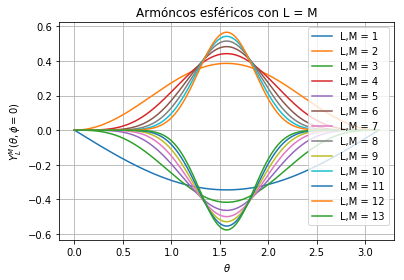

In [70]:
x = np.arange(0,np.pi,0.0001)
for L in range(1,14):
    y = re_Y(L,L,x,0)
    plt.plot(x,y,label = 'L,M = '+str(L))

plt.legend()
plt.xlabel(r'$\theta$')
plt.ylabel(r'$Y_{L}^{M}(\theta,\phi=0)$')
plt.title('Armóncos esféricos con L = M')
plt.grid(True)
plt.show()

Cuando L crece los Armónicos Esféricos parecen aproximarse a algún tipo de distribución (tal vez gaussiana) centrada en $\pi/2$

## 3. Error numérico de la ecuación cuadrática

#### a)Solución convencional

In [9]:
def raiz_quad(a,b,c):
    if a == 0:
        print('Esa no es una ecuación cuadrática')
        return np.nan
    x1 = (-b+sc.sqrt(b**2-4*a*c))/(2*a)
    x2 = (-b-sc.sqrt(b**2-4*a*c))/(2*a)
    return [x1,x2]

In [10]:
raiz_quad(2,2,2)

[(-0.5+0.8660254037844386j), (-0.5-0.8660254037844386j)]

In [11]:
raiz_quad(0.001,1000,0.001)

[-9.999894245993346e-07, -999999.999999]

#### b) Solución modificada

In [15]:
def raiz_quad(a,b,c):
    if a == 0:
        print('Esa no es una ecuación cuadrática')
        return np.nan
    x1 = 2*c/(-b-sc.sqrt(b**2-4*a*c))
    x2 = 2*c/(-b+sc.sqrt(b**2-4*a*c))
    return [x1,x2]

In [16]:
raiz_quad(2,2,2)

[(-0.5000000000000001+0.8660254037844387j),
 (-0.5000000000000001-0.8660254037844387j)]

In [17]:
raiz_quad(0.001,1000,0.001)

[-1.000000000001e-06, -1000010.5755125057]

Cuando a*c es muy pequeño comparado con b, la raiz cuadrada del discriminante es prácticamente b, de manera que la solución con el signo menos (x2 en en primero, x1 en el segundo) será prácticamente cero, lo que será comparable con los errores numéricos en la raíz. Vemos que en ambos casos dichas soluciones son las que no se asemejan a la solución real: 
-1e-6 ó -1e6 

# 4. Evaluando nuestros métodos

In [9]:
def Incremental(f,a,b,dx=1e-5):
    i = 0
    for x in np.arange(a,b,dx):
        if f(x)*f(x+dx) <= 0:
            return [x,i]
        i+=1
    print('Raiz no encontrada')
    return [a,i]

In [10]:
def Biseccion(f,a,b,E=1e-6):
    i = 0
    if f(a)*f(b) >= 0:
        print('Error, tienes que elegir un intervalo con cambio de signo')
        return np.nan
    x1 = a
    x2 = b
    while abs(x2-x1) > E:
        x3 = 0.5*(x2+x1)
        if f(x1)*f(x3) < 0:
            x2 = x3
        elif f(x2)*f(x3) < 0:
            x1 =x3
        elif f(x3) == 0:
            return [x3,i]
        i+=1
    return [x3, i]

In [11]:
def Newton(f,df,x,E=1e-6):
    i=0
    x0 = x
    while abs(f(x0)) > E:
        x1 = x0 -f(x0)/df(x0)
        x0 = x1
        i += 1
    return [x0,i]

In [12]:
def Secante(f, x0, x1, E=1e-6):
    i=0
    while abs(f(x0)) > E:
        x2 = x1 - f(x1)*((f(x1)-f(x0))/(x1-x0))**(-1)
        x0 = x1
        x1 = x2
        i+=1
    return [x1,i]

In [13]:
def Ridders(f, x0, x2, E  = 1e-6):
    i=0
    if f(x0)*f(x2) >= 0:
        print('Intervalo inválido, elige uno en donde haya un cambio de signo')
        return [np.nan,0]
    while True:
        x1 = 0.5*(x0+x2)
        x3 = x1 + np.sign(f(x0))*(x2-x1)*f(x1)/np.sqrt(f(x1)**2-f(x0)*f(x2))
        if abs(f(x3)) < E:
            break
        elif f(x3)*f(x0) < 0:
            x2 = x3
        elif f(x3)*f(x1) < 0:
            x0 = min(x3,x1)
            x2 = max(x3,x1)
        elif f(x3)*f(x2) < 0:
            x0 = min(x3,x2)
            x2 = max(x3,x2)
        else:
            print('Algo salió mal')
        i+=1
    return [x3,i]

#### i) x-cos(x) = 0 en (0,$\pi/2$)

In [12]:
a,b = 0,np.pi/2
f = lambda x: x-np.cos(x)
df = lambda x: 1+np.sin(x)

print(Incremental(f, a, b, dx = 1e-5))
print(Biseccion(f, a, b, E=1e-6))
print(Newton(f, df, 0.5*(a+b), E=1e-6))
print(Secante(f, a, b, E=1e-6))
print(Ridders(f, a, b, E=1e-6))

[0.7390800000000001, 73908]
[0.7390858752647542, 21]
[0.7390851781060102, 2]
[0.7390851332151607, 6]
[0.7390848878903103, 2]


Incremental es el peor. Newton y Ridders se tardan lo mismo para llegar a una exactitud similar, pero Ridders no necesita la derivada y Newton sí: Ridders es el mejor.

#### ii) f(x) = cos(x)-x^3 con x0 = 0.5

In [11]:
a,b = 0,1
f = lambda x: np.cos(x)-x**3
df = lambda x: -np.sin(x)-3*x**2

print(Incremental(f, a, b))
print(Biseccion(f, a, b, E=1e-6))
print(Newton(f, df, 0.5*(a+b), E=1e-6))
print(Secante(f, a, b, E=1e-6))
print(Ridders(f, a, b, E=1e-6))

[0.8654700000000001, 86547]
[0.865473747253418, 20]
[0.8654740331109566, 5]
[0.8654740331016144, 7]
[0.8654740642003137, 5]


La conclusión es la misma que en (i)

#### iii) $tan(\pi x)-6 = 0$ en (0,1) 

En (0,1) no hay cambio de signo, lo tenemos que cambiar a (0,0.48)

In [15]:
a,b = 0,0.48
f = lambda x: np.tan(np.pi*x)-6
df = lambda x: np.pi/np.cos(np.pi*x)**2

print(Incremental(f, a, b))
print(Biseccion(f, a, b, E=1e-6))
print(Newton(f, df, 0.5*(a+b), E=1e-6))
print(Secante(f, a, b, E=1e-6))
print(Ridders(f, a, b, E=1e-6))

[0.44743000000000005, 44743]
[0.4474319458007812, 19]
[5.447431546391654, 7]
[nan, 675]
[0.44743154353076525, 5]


C:\Users\Andres Gomez\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
C:\Users\Andres Gomez\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in tan
  


Secante se encuentra con el polo de la función tangente, de modo que es la peor. Newton encuentra la raiz en otro punto, devido a la periodicidad de la función tangente. Ridders claramente es la mejor.

#### iv) $f(x) = \frac{1}{(x-0.3)^2+0.01}-\frac{1}{(x-0.8)^2+0.04}$

In [17]:
a,b = -1,1
f = lambda x: 1/((x-0.3)**2+0.01)-1/((x-0.8)**2+0.04)
df = lambda x: -2*(x-0.3)/((x-0.3)**2+0.01)**2+2*(x-0.8)/((x-0.8)**2+0.04)**2

print(Incremental(f, a, b))
print(Biseccion(f, a, b, E=1e-6))
print(Newton(f, df, 0.5*(a+b), E=1e-6))
print(Secante(f, a, b, E=1e-6))
print(Ridders(f, a, b, E=1e-6))

[0.5799999999928094, 158000]
[0.5800008773803711, 21]
[-113.98714007248321, 19]
[-122.46009718578703, 24]
[0.58, 11]


Incremental es el peor, Newton y secante encuentran otra raíz en otro punto, Ridders es el mejor.

#### v) $f(x) = x^4-6.4x^3+6.45x^2+20.538x-31.752$

In [34]:
a,b = 1,5
f = lambda x: x**4-6.4*x**3+6.45*x**2+20.538*x-31.752
df = lambda x: 4*x**3-3*6.4*x**2+2*6.45*x+20.538

print(Incremental(f, a, b))
print(Biseccion(f, a, b, E=1e-6))
print(Newton(f, df, 0.5*(a+b), E=1e-6))
print(Secante(f, a, b, E=1e-6))
print(Ridders(f, a, b, E=1e-6))

[3.9999900000196535, 299999]
[4.000000953674316, 22]
[2.1001839074397037, 11]
[2.0998252960401365, 18]
[3.999999999992667, 5]


Todos encuentran raíces distintas (polinomio de orden 4), pero Incremental se tarda más y Ridders menos.

# 5. Temperatura crítica

In [75]:
def V(x, T):
    m2 = 600
    L = 1
    GE = 0.5772156649
    M = sc.sqrt(L*x**2/2-m2)
    Mef = sc.sqrt(M**2+L*T**2/24)
    V = -m2*x**2/2 + L*x**4/24 +7*L*m2*x**2/(128*np.pi**2)-3/4*L*x**4/(128*np.pi**2)-M**4/(64*np.pi**2)*(np.log(2*m2/(16*np.pi**2*T**2))-3/2+2*GE)-np.pi**2*T**4/90+M**2*T**2/24-Mef**3*T/(12*np.pi)-m2*L*(1+GE)*x**2/(32*np.pi**2)+T*L*x**2/(16*np.pi)*sc.sqrt(T**2*L/24-m2)-m2*L/(64*np.pi**2)*np.log(m2/(8*np.pi**2*T**2))*x**2
    return np.real(V)

def Raiz_Potencial(T):
    def f(x):
        if x >= 0:
            return V(x,T)-V(0,T)
        elif x <= 0:
            return x #Para poder Tomar Ridders que busque el cero también en el origen
    return Ridders(f, -1, 30, E=1e-6)[0]

In [28]:
T = np.sqrt(24*m2/L) #T minimo
Raiz_Potencial(T)

[25.46331390710953, 5197]

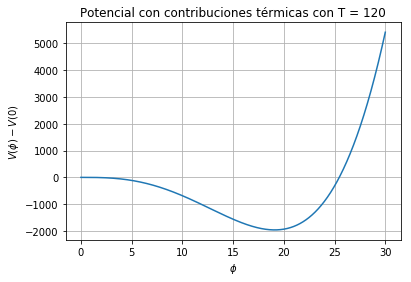

In [87]:
m2 = 600
L = 1
T = 120
x = np.arange(0,30,0.0001)
y = V(x,T)-V(0,T)
plt.plot(x,y)

plt.xlabel(r'$\phi$')
plt.ylabel(r'$V(\phi)-V(0)$')
plt.title('Potencial con contribuciones térmicas con T = '+str(T))
plt.grid(True)
plt.show()

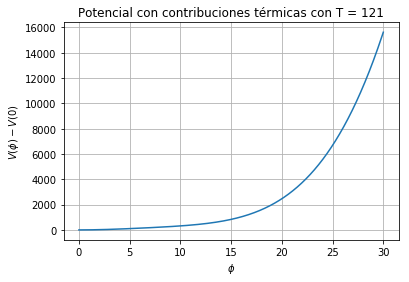

In [57]:
m2 = 600
L = 1
T = 121
x = np.arange(0,30,0.0001)
y = V(x,T)-V(0,T)
plt.plot(x,y)

plt.xlabel(r'$\phi$')
plt.ylabel(r'$V(\phi)-V(0)$')
plt.title('Potencial con contribuciones térmicas con T = '+str(T))
plt.grid(True)
plt.show()

Con 121 ya nos pasamos de la temperatura crítica, encontraremos gráficamente la temperatura crítica en ese intervalo (120,121) calculando la Raíz que encuentra Ridders

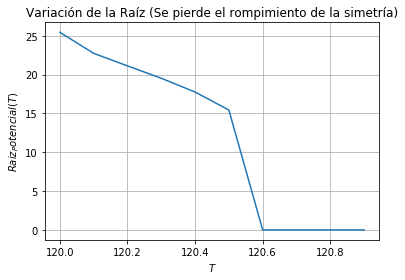

In [86]:
x = np.arange(120,121,0.1)
y = []
for T in x:
    y.append(Raiz_Potencial(T))
plt.plot(x,np.array(y))

plt.xlabel(r'$T$')
plt.ylabel(r'$Raiz_Potencial(T)$')
plt.title('Variación de la Raíz (Se pierde el rompimiento de la simetría)')
plt.grid(True)
plt.show()

La temperatura crítica se encuentra entre 120.5 y 120.6. Hagamos otra gráfica con un mallado más fino en ese intervalo más corto para encontrarla

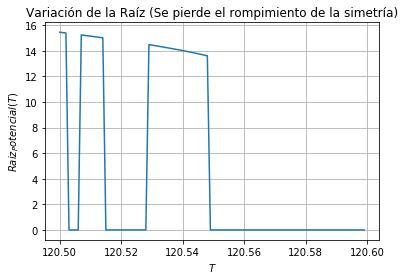

In [88]:
x = np.arange(120.5,120.6,0.001)
y = []
for T in x:
    y.append(Raiz_Potencial(T))
plt.plot(x,np.array(y))

plt.xlabel(r'$T$')
plt.ylabel(r'$Raiz_Potencial(T)$')
plt.title('Variación de la Raíz (Se pierde el rompimiento de la simetría)')
plt.grid(True)
plt.show()

La temperatura crítica es cuando Ridders deja de encontrar a una raíz distinta de cero, lo cual pasa alrededor de T = 120.55
Variando la gráfica del potencial un poco se encuentra que la temperatura crítica exacta es T = 120.65, como se puede ver a continuación:

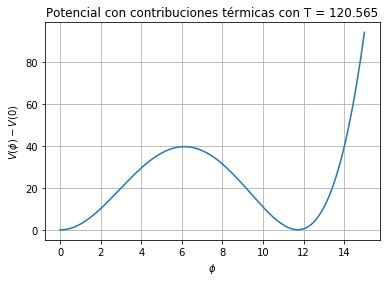

In [90]:
m2 = 600
L = 1
T = 120.565
x = np.arange(0,15,0.0001)
y = V(x,T)-V(0,T)
plt.plot(x,y)

plt.xlabel(r'$\phi$')
plt.ylabel(r'$V(\phi)-V(0)$')
plt.title('Potencial con contribuciones térmicas con T = '+str(T))
plt.grid(True)
plt.show()